# Exploratory Data Analysis (EDA) for Customer Churn Dataset
This notebook provides a comprehensive exploratory data analysis of the customer churn dataset. We will examine the data structure, missing values, distributions, relationships, and key insights that can inform modeling.

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load the Data
We will load the raw dataset and display its basic structure.

In [12]:
# Load the raw data
df = pd.read_csv('../data/raw/raw.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Overview
Let's check the shape, columns, and data types.

In [13]:
# Data shape and info
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()

Rows: 7043, Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

## 3. Missing Values Analysis
Identify missing values in the dataset.

In [14]:
# Missing values count
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

## 4. Target Variable Distribution
Examine the distribution of the target variable `Churn`.

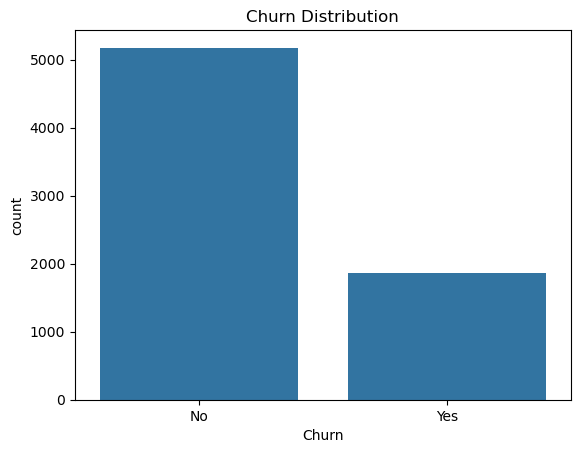

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [15]:
# Target variable distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()
df['Churn'].value_counts(normalize=True)

## 5. Numerical Feature Distributions
Visualize the distributions of key numerical features.

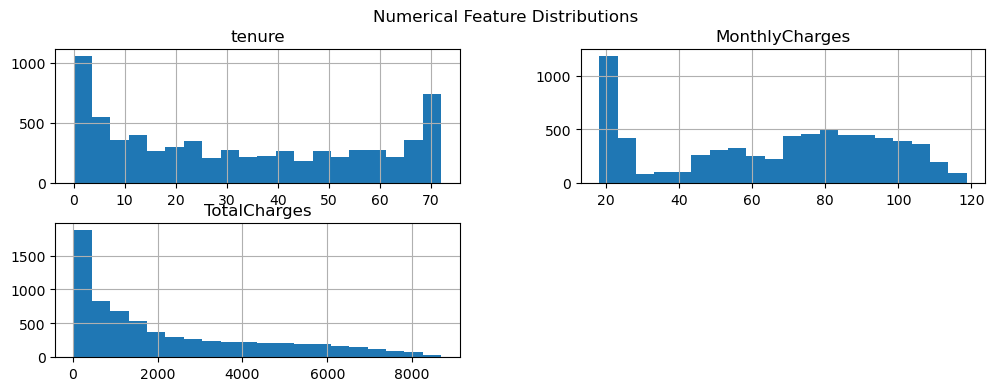

In [16]:
# Numerical features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols].hist(bins=20, figsize=(12, 4))
plt.suptitle('Numerical Feature Distributions')
plt.show()

## 6. Categorical Feature Distributions
Show the distribution of selected categorical features.

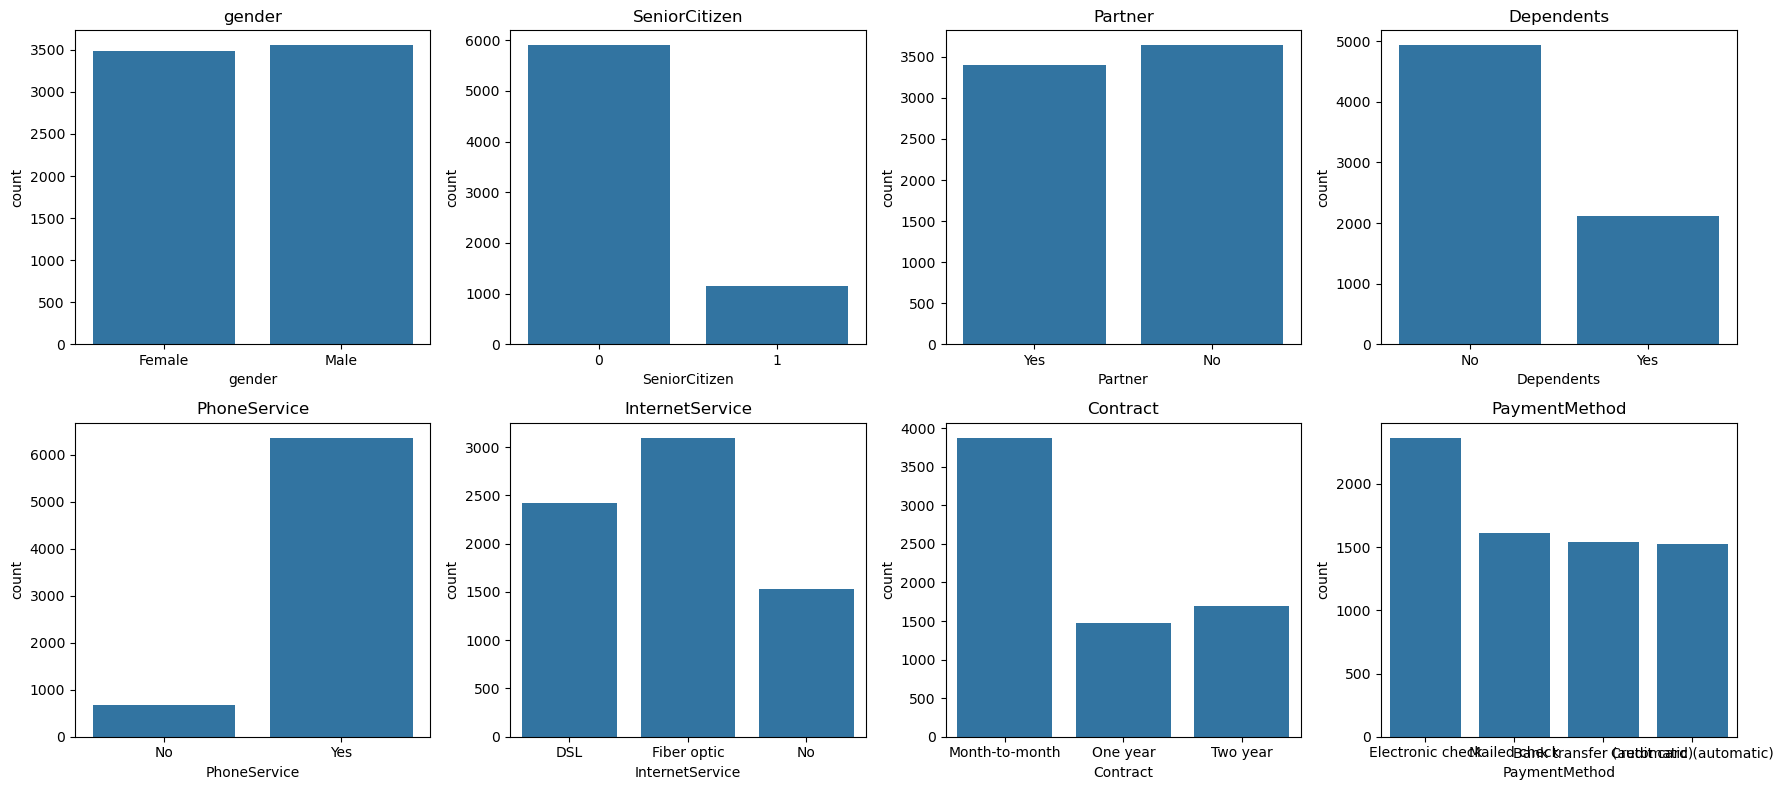

In [17]:
# Categorical features
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

## 7. Churn Rate by Categorical Features
Analyze how churn varies across key categorical features.

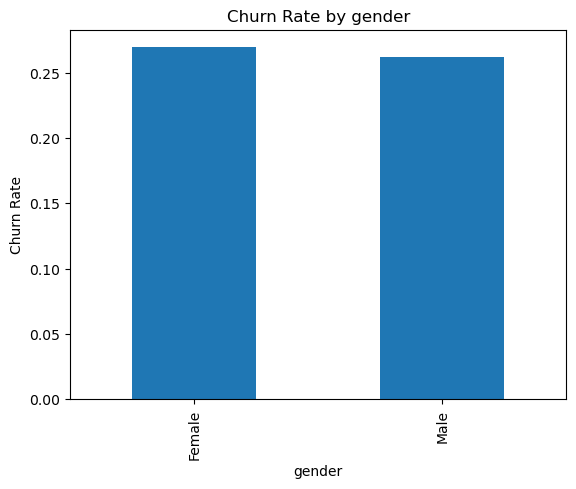

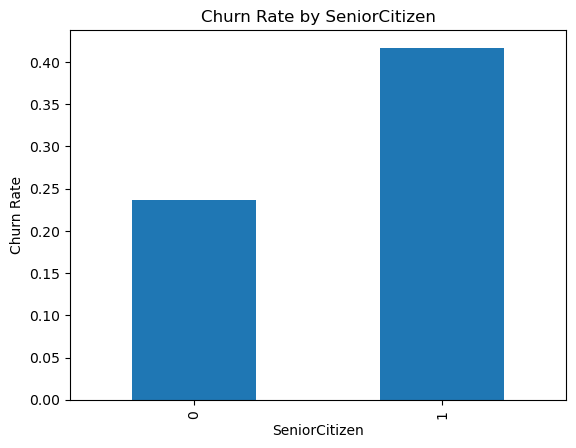

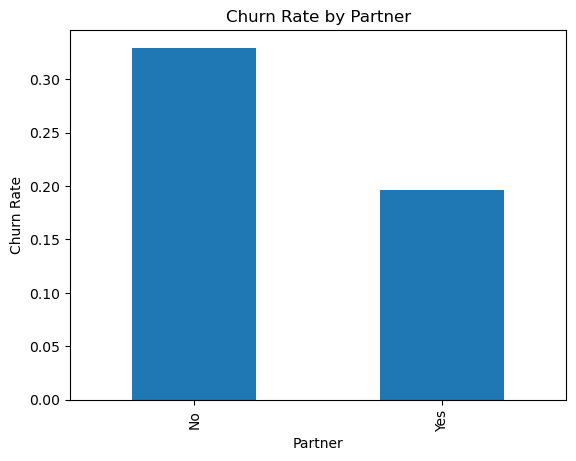

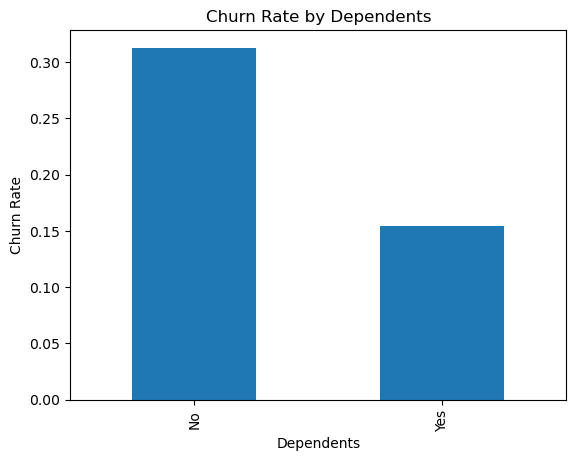

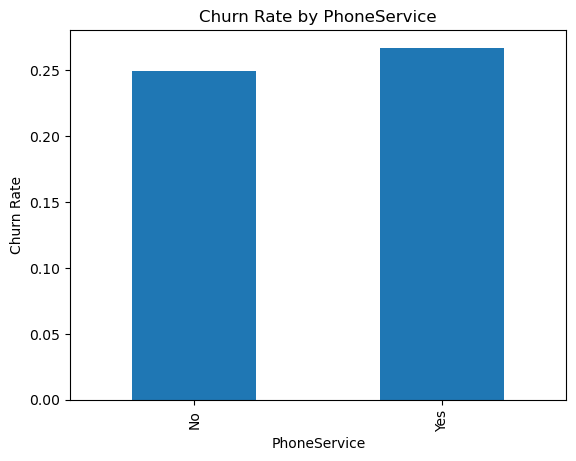

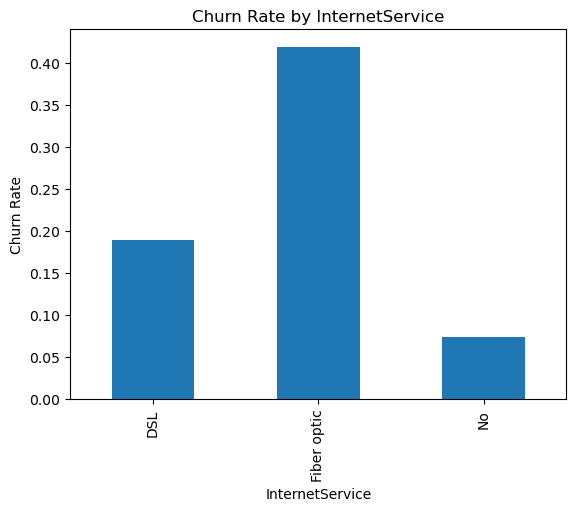

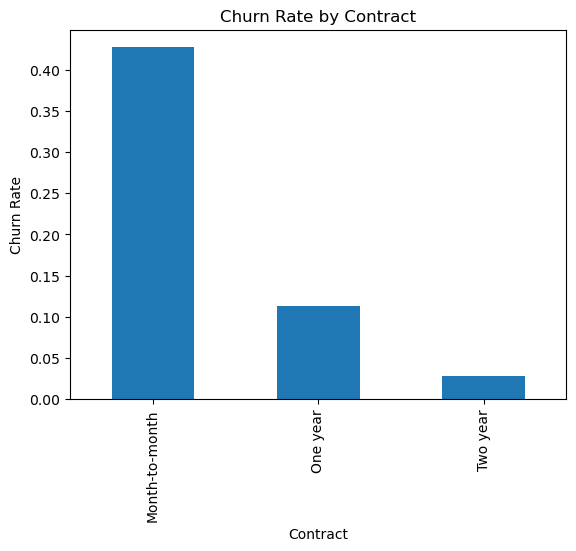

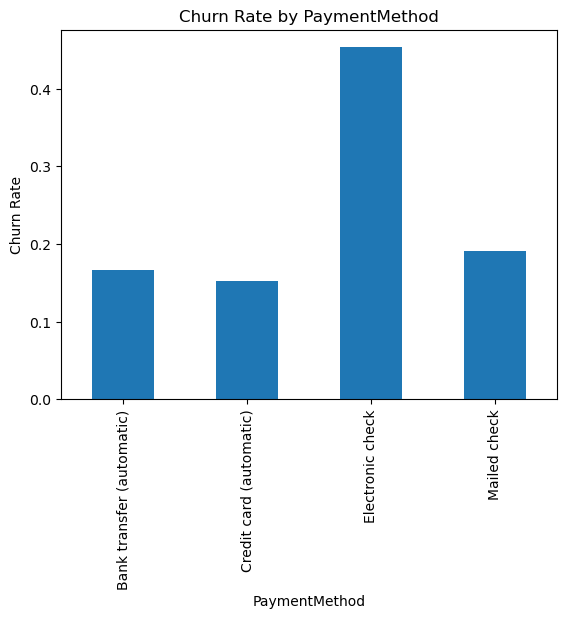

In [18]:
# Churn rate by categorical features
for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().get('Yes', pd.Series())
    churn_rate.plot(kind='bar', title=f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.show()

## 8. Correlation Analysis
Check correlations between numerical features and churn.

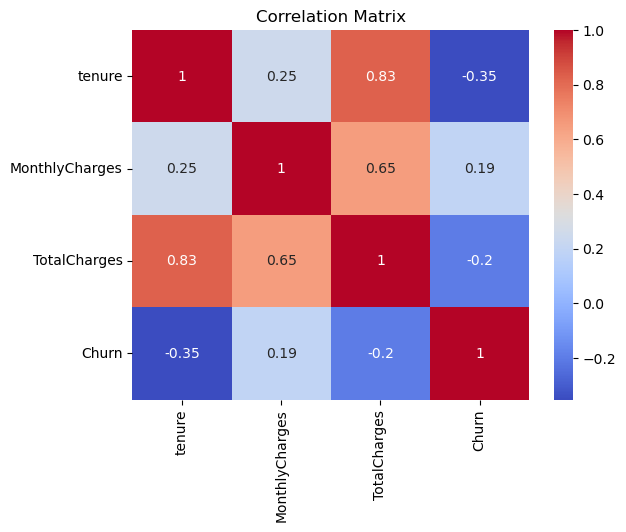

In [19]:
# Encode target for correlation
corr_df = df.copy()
corr_df['Churn'] = corr_df['Churn'].map({'Yes': 1, 'No': 0})
sns.heatmap(corr_df[num_cols + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 9. Insights and Observations
- The dataset is moderately imbalanced with more non-churned customers.
- Senior citizens, customers with month-to-month contracts, and those with higher monthly charges have higher churn rates.
- Tenure is negatively correlated with churn: newer customers are more likely to churn.
- Some features have missing values (notably `TotalCharges`), which should be imputed.
- Categorical features like contract type and payment method show strong relationships with churn.

These insights will guide feature engineering and model selection.